In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

data = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\relatedPaper\dataArticle\publicData\data.xlsx')
data.columns
data

Index(['Person', 'State', 'x', 'y', 'z'], dtype='object')

,Person,State,x,y,z
0,33.0,Jogging,-0.694638,12.680544,0.503953
1,33.0,Jogging,5.012288,11.264028,0.953424
2,33.0,Jogging,4.903325,10.882658,-0.081722
3,33.0,Jogging,-0.612916,18.496431,3.023717
4,33.0,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1048570,7.0,Standing,-8.080000,5.090000,-0.690000
1048571,7.0,Standing,-8.120000,5.520000,-0.800000
1048572,7.0,Standing,-7.890000,5.790000,-0.720000
1048573,7.0,Standing,-7.890000,5.980000,-0.270000


In [4]:
G = 9.81
data['x'] = data['x'].div(G)
data['y'] = data['y'].div(G)
data['z'] = data['z'].div(G)
data

,Person,State,x,y,z
0,33.0,Jogging,-0.007218,0.131765,0.005237
1,33.0,Jogging,0.052083,0.117046,0.009907
2,33.0,Jogging,0.050951,0.113083,-0.000849
3,33.0,Jogging,-0.006369,0.192198,0.031420
4,33.0,Jogging,-0.012313,0.125821,0.074870
...,...,...,...,...,...
1048570,7.0,Standing,-0.083960,0.052891,-0.007170
1048571,7.0,Standing,-0.084376,0.057359,-0.008313
1048572,7.0,Standing,-0.081986,0.060165,-0.007482
1048573,7.0,Standing,-0.081986,0.062139,-0.002806


In [5]:
data = data.drop(columns = 'Person')
df = data.groupby(['State'])
df.first()

,x,y,z
State,,,
Downstairs,-0.000425,0.051800,0.067652
Jogging,-0.007218,0.131765,0.005237
Sitting,0.027017,0.100378,0.010756
Standing,-0.019535,0.102352,-0.002406
Upstairs,0.105157,0.045007,-0.039345
Walking,0.008775,0.083220,0.029014


In [6]:
Downstairs = df.get_group(('Downstairs'))
Jogging = df.get_group(('Jogging'))
Sitting = df.get_group(('Sitting'))
Standing = df.get_group(('Standing'))
Upstairs = df.get_group(('Upstairs'))
Walking = df.get_group(('Walking'))

len(Downstairs)
len(Jogging)
len(Sitting)
len(Standing)
len(Upstairs)
len(Walking)

97813

325975

54876

44541

118589

406776

In [7]:
stand = Standing
len(stand)
sit = Sitting
len(sit)
jog = Jogging
len(jog)
walk = Downstairs.append(Upstairs).append(Walking)
len(walk)

44541

54876

325975

623178

In [8]:
#Check nan value & remove 
len(walk.index)

walk = walk.dropna()
walk.index = pd.RangeIndex(len(walk.index))
len(walk.index)
walk.isnull().sum().sum()

type(walk)

623178

623177

0

pandas.core.frame.DataFrame

# Prepare data

Standing = dt[['STD', 'Unnamed: 1', 'Unnamed: 2']] 
# Delete columns contain missing value (NaN or not value)
Standing = Standing.dropna()
# Create index (start from 1) in first column
Standing.index = pd.RangeIndex(len(Standing.index))
# Drop the first row ((Xoá hàng x,y,z))
Standing = Standing.drop(0) 


Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']] 
Walking_normal = Walking_normal.dropna()
Walking_normal.index = pd.RangeIndex(len(Walking_normal.index)) 
Walking_normal = Walking_normal.drop(0)

Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jumping = Jumping.dropna()
Jumping.index = pd.RangeIndex(len(Jumping.index)) 
Jumping = Jumping.drop(0)

Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']] 
Jogging = Jogging.dropna()
Jogging.index = pd.RangeIndex(len(Jogging.index)) 
Jogging = Jogging.drop(0)

Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_up = Stairs_up.dropna()
Stairs_up.index = pd.RangeIndex(len(Stairs_up.index)) 
Stairs_up = Stairs_up.drop(0)

Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Stairs_down = Stairs_down.dropna()
Stairs_down.index = pd.RangeIndex(len(Stairs_down.index)) 
Stairs_down = Stairs_down.drop(0)

Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']] 
Fall_front_knees_lying = Fall_front_knees_lying.dropna()
Fall_front_knees_lying.index = pd.RangeIndex(len(Fall_front_knees_lying.index)) 
Fall_front_knees_lying = Fall_front_knees_lying.drop(0)

Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Fall_forward_lying = Fall_forward_lying.dropna()
Fall_forward_lying.index = pd.RangeIndex(len(Fall_forward_lying.index)) 
Fall_forward_lying = Fall_forward_lying.drop(0)

Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 
Sideward_lying = Sideward_lying.dropna()
Sideward_lying.index = pd.RangeIndex(len(Sideward_lying.index)) 
Sideward_lying = Sideward_lying.drop(0)


In [9]:
stand_x = stand['x'][0:200]
stand_y = stand['y'][0:200]
stand_z = stand['z'][0:200]

sit_x = sit['x'][0:200]
sit_y = sit['y'][0:200]
sit_z = sit['z'][0:200]

jog_x = jog['x'][0:200]
jog_y = jog['y'][0:200]
jog_z = jog['z'][0:200]

walk_x = walk['x'][0:200]
walk_y = walk['y'][0:200]
walk_z = walk['z'][0:200]

stand_x

223432   -0.019535
223433   -0.001974
223434   -0.006339
223435    0.007897
223436    0.004364
            ...   
223627    0.009872
223628    0.014340
223629    0.020263
223630    0.017561
223631    0.006754
Name: x, Length: 200, dtype: float64

Text(0.5, 1.0, 'Standing')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Sitting')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Jogging')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Walking')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

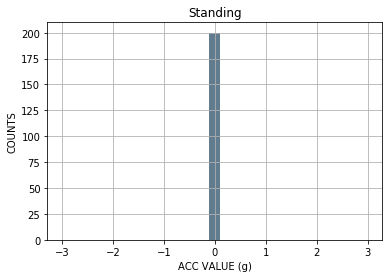

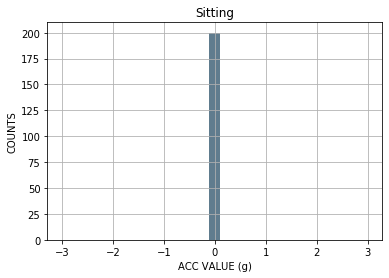

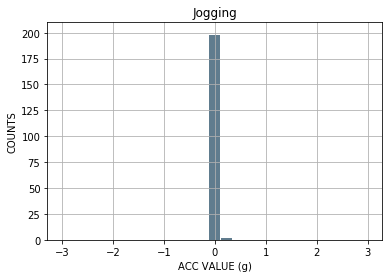

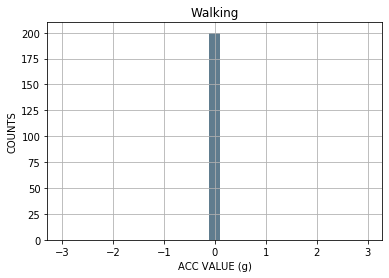

In [10]:
# histogram
# X-asis

stand_x.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9, color='#607c8e')   
                    #grid=True: tạo thêm lưới dọc
                    #bin: số khoảng giá trị được chia ra từ range, có bao nhiêu counts xuất hiện trong khoảng đó
plt.title('Standing')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(2) # show 2 hình trên 2 cửa sổ figure riêng biệt 
sit_x.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Sitting')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(3) 
jog_x.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Jogging')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(4) 
walk_x.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Walking')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

Text(0.5, 1.0, 'Standing')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Sitting')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Jogging')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Walking')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

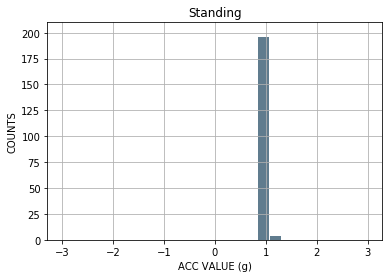

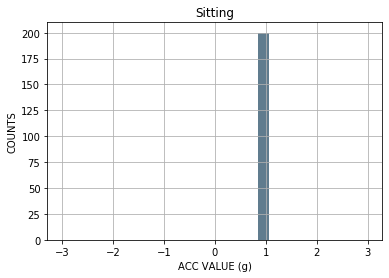

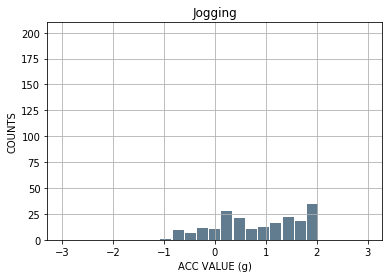

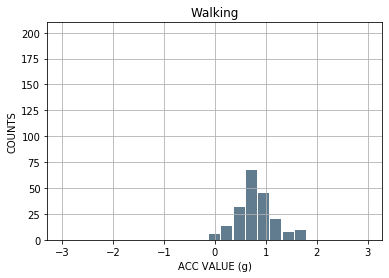

In [23]:
# Y-asis

stand_y.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9, color='#607c8e')   
plt.title('Standing')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(2)
sit_y.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Sitting')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(3) 
jog_y.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Jogging')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(4) 
walk_y.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Walking')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

Text(0.5, 1.0, 'Standing')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Sitting')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Jogging')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Walking')

Text(0, 0.5, 'COUNTS')

Text(0.5, 0, 'ACC VALUE (g)')

(0, 210)

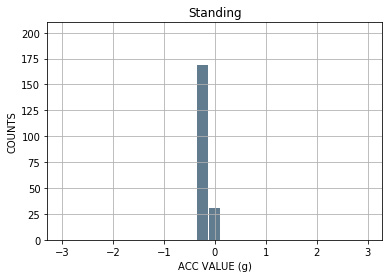

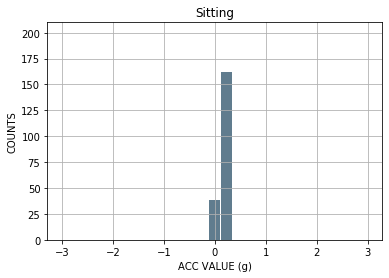

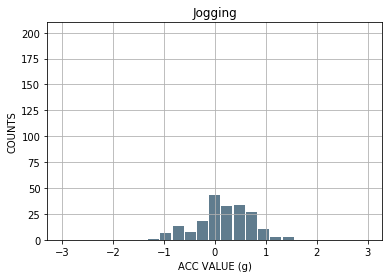

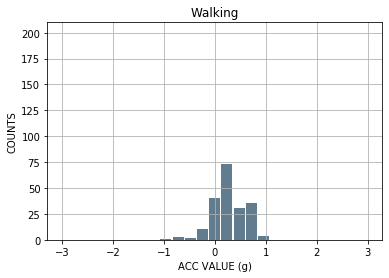

In [24]:
# Z-asis

stand_z.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9, color='#607c8e')   
plt.title('Standing')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(2)
sit_z.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Sitting')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(3) 
jog_z.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Jogging')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])

plt.figure(4) 
walk_z.plot.hist(grid=True, bins=25, range=[-3,3], rwidth=0.9,
                   color='#607c8e')
plt.title('Walking')
plt.ylabel('COUNTS')
plt.xlabel('ACC VALUE (g)')
plt.ylim([0, 210])